In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%precision %.2f
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
imdb = pd.read_csv('imdb_5000.csv')

In [3]:
imdb.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.00,178.00,0.00,855.00,Joel David Moore,"1,000.00","760,505,847.00",Action|Adventure|Fantasy|Sci-Fi,...,"3,054.00",English,USA,PG-13,"237,000,000.00","2,009.00",936.00,7.90,1.78,33000
1,Color,Gore Verbinski,302.00,169.00,563.00,"1,000.00",Orlando Bloom,"40,000.00","309,404,152.00",Action|Adventure|Fantasy,...,"1,238.00",English,USA,PG-13,"300,000,000.00","2,007.00","5,000.00",7.10,2.35,0
2,Color,Sam Mendes,602.00,148.00,0.00,161.00,Rory Kinnear,"11,000.00","200,074,175.00",Action|Adventure|Thriller,...,994.00,English,UK,PG-13,"245,000,000.00","2,015.00",393.00,6.80,2.35,85000
3,Color,Christopher Nolan,813.00,164.00,"22,000.00","23,000.00",Christian Bale,"27,000.00","448,130,642.00",Action|Thriller,...,"2,701.00",English,USA,PG-13,"250,000,000.00","2,012.00","23,000.00",8.50,2.35,164000
4,NaN,Doug Walker,nan,nan,131.00,nan,Rob Walker,131.00,nan,Documentary,...,nan,NaN,NaN,NaN,nan,nan,12.00,7.10,nan,0


In [4]:
imdb.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [5]:
columns_filter = [
    'color', 'director_name', 'duration', 'gross', 'genres', 'movie_title', 'num_voted_users',
    'language', 'country', 'budget', 'title_year', 'imdb_score'
]

## Desafio 1 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Plotar e analisar o Boxplot da média (coluna imbd_score) dos filmes em preto e branco e coloridos.

In [6]:
imdb['color'].unique()

array(['Color', nan, ' Black and White'], dtype=object)

In [7]:
imdb_mean_by_color = imdb.groupby('color').mean().reset_index()

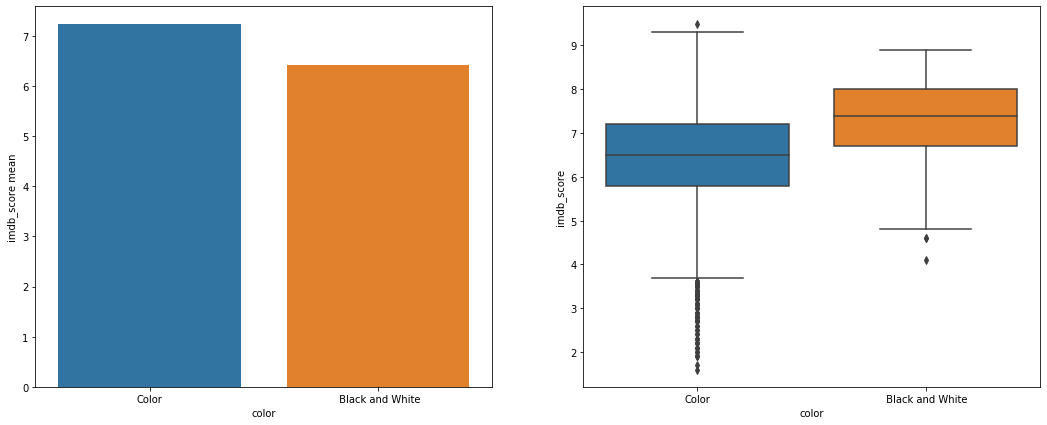

In [8]:
fig, axes = plt.subplots(1, 2, figsize=(18, 7), sharex=True)
sns.barplot(
    data = imdb_mean_by_color,
    x='color',
    y='imdb_score',
    ax=axes[0]
).set_ylabel("imdb_score mean")

sns.boxplot(
    data = imdb,
    x='color',
    y='imdb_score'
)
plt.show()

In [9]:
imdb.query('imdb_score >= 9.5')[columns_filter]

,color,director_name,duration,gross,genres,movie_title,num_voted_users,language,country,budget,title_year,imdb_score
2765,Color,John Blanchard,65.00,nan,Comedy,Towering Inferno,10,English,Canada,nan,nan,9.50


In [10]:
votes_by_score = imdb.query('color=="Color"')[['num_voted_users','imdb_score']]
votes_by_score.describe()

,num_voted_users,imdb_score
count,"4,815.00","4,815.00"
mean,"83,405.57",6.41
std,"137,196.09",1.12
min,5.00,1.60
25%,"8,858.00",5.80
50%,"34,471.00",6.50
75%,"96,112.50",7.20
max,"1,689,764.00",9.50


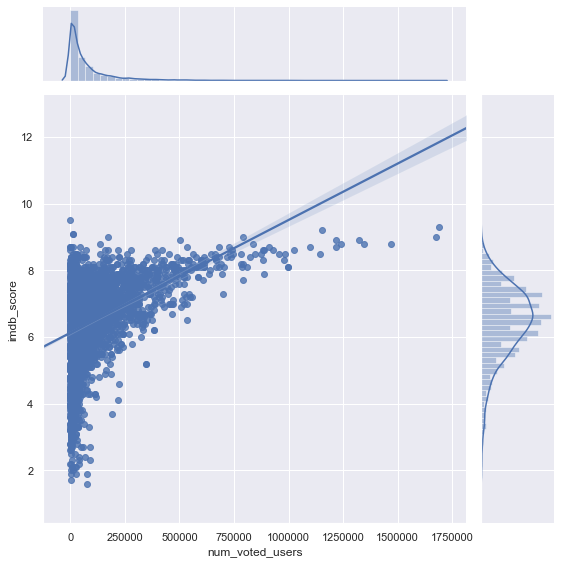

In [11]:
sns.set(style="darkgrid")

tips = sns.load_dataset("tips")
g = sns.jointplot(
    "num_voted_users", 
    "imdb_score", 
    data=votes_by_score,
    kind="reg", 
    truncate=False,
    height=8
)

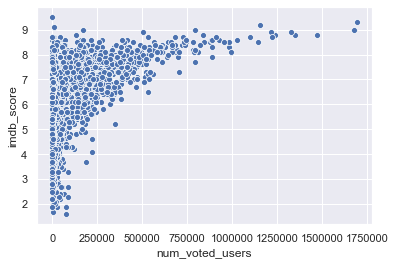

In [12]:
sns.scatterplot(x="num_voted_users", y="imdb_score", data = votes_by_score)

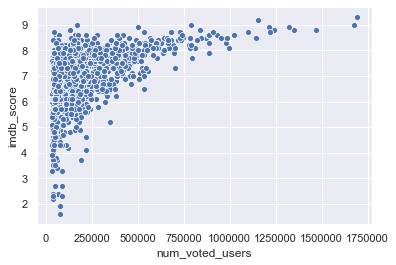

In [13]:
sns.scatterplot(
    x="num_voted_users", 
    y="imdb_score", 
    data=votes_by_score.query(f"num_voted_users>{imdb['num_voted_users'].median()}")
)

## Desafio 2 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)

No gráfico de **budget por lucro** temos um ponto com muito custo e prejuizo, descubra com é esse filme (budget próximo de 2.5).

In [14]:
profit = imdb['gross'] - imdb['budget']
profit.name='profit'

In [15]:
imdb_profit = imdb[columns_filter].join(profit)

In [16]:
# USA films to guarantee the same currency
imdb_profit = imdb_profit.query('country=="USA"')
budget_profit = imdb_profit.query("budget >0 | gross > 0")[["budget", "profit"]].dropna()

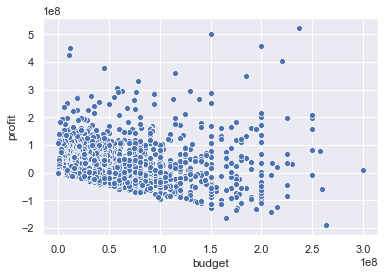

In [17]:
sns.scatterplot(
    x="budget", 
    y="profit", 
    data=budget_profit
)

In [18]:
imdb_profit.query('profit<-1e8 & budget>2.5e8')

,color,director_name,duration,gross,genres,movie_title,num_voted_users,language,country,budget,title_year,imdb_score,profit
5,Color,Andrew Stanton,132.00,"73,058,679.00",Action|Adventure|Sci-Fi,John Carter,212204,English,USA,"263,700,000.00","2,012.00",6.60,"-190,641,321.00"


## Desafio 3 do [Guilherme Silveira](https://twitter.com/guilhermecaelum)


Em aula falamos que talvez, filmes mais recentes podem ter prejuizo pois ainda não tiveram tempo de recuperar o investimento. Analise essas informações e nos conte quais foram suas conclusões.

In [19]:
print("PROFIT PER YEAR")
imdb_profit.groupby('title_year').describe()['profit'].iloc[-17:,:]

PROFIT PER YEAR


,count,mean,std,min,25%,50%,75%,max
title_year,,,,,,,,
"2,000.00",131.00,"8,808,800.84","36,875,536.07","-52,526,755.00","-10,068,216.00","802,119.00","17,793,041.50","143,630,478.00"
"2,001.00",143.00,"12,269,579.99","43,696,781.74","-104,868,170.00","-10,669,545.50","1,610,731.00","21,875,255.50","207,652,016.00"
"2,002.00",147.00,"15,961,686.35","53,437,392.53","-101,879,446.00","-10,015,768.50","2,844,929.00","28,034,260.00","264,706,375.00"
"2,003.00",123.00,"16,133,915.39","52,589,745.52","-60,519,261.00","-8,108,324.50","2,588,228.00","29,984,553.00","286,838,870.00"
"2,004.00",138.00,"10,191,367.07","52,384,964.68","-164,334,574.00","-12,580,423.75","-490,077.00","30,623,426.25","286,471,036.00"
"2,005.00",131.00,"7,066,027.69","43,931,548.05","-103,295,584.00","-11,066,546.00","264,487.00","19,871,605.00","267,262,555.00"
"2,006.00",137.00,"12,965,790.82","40,113,290.69","-99,344,497.00","-6,457,975.00","1,289,999.00","19,143,839.00","198,032,628.00"
"2,007.00",127.00,"13,677,422.91","46,031,199.12","-109,916,481.00","-9,464,825.00","-407,362.00","24,272,886.50","168,759,914.00"
"2,008.00",143.00,"11,535,731.70","48,540,872.44","-83,385,977.00","-11,158,461.50","-636,215.00","22,862,341.00","348,316,061.00"


In [20]:
imdb_2016 = imdb_profit.query('title_year==2016')
imdb_2016.describe()

,duration,gross,num_voted_users,budget,title_year,imdb_score,profit
count,77.00,53.00,77.00,70.00,77.00,77.00,51.00
mean,108.51,"78,543,564.43","38,617.45","59,915,000.00","2,016.00",6.19,"6,662,699.37"
std,18.19,"82,940,945.76","76,818.26","67,011,250.06",0.00,1.20,"65,447,533.93"
min,80.00,"560,512.00",13.00,"150,000.00","2,016.00",3.40,"-113,021,005.00"
25%,96.00,"28,876,924.00","1,180.00","11,125,000.00","2,016.00",5.40,"-25,607,491.00"
50%,106.00,"55,461,307.00","13,562.00","27,000,000.00","2,016.00",6.30,"5,566,327.00"
75%,117.00,"102,315,545.00","42,372.00","100,000,000.00","2,016.00",6.90,"34,843,235.50"
max,183.00,"407,197,282.00","479,047.00","250,000,000.00","2,016.00",9.10,"305,024,263.00"


In [21]:
imdb_2016.shape

(77, 13)

In [22]:
imdb_profit.query('title_year==2016 & profit<0').shape

(23, 13)

In [23]:
imdb_profit.query('title_year==2016 & profit>=0').shape

(28, 13)

In [24]:
imdb_2016[imdb_2016['profit'].isna()].shape

(26, 13)

In [25]:
print(f"lucro negativo: {round(23/77,2)}")
print(f"lucro positivo: {round(28/77,2)}")
print(f"lucro não informado: {round(26/77,2)}")

lucro negativo: 0.3
lucro positivo: 0.36
lucro não informado: 0.34


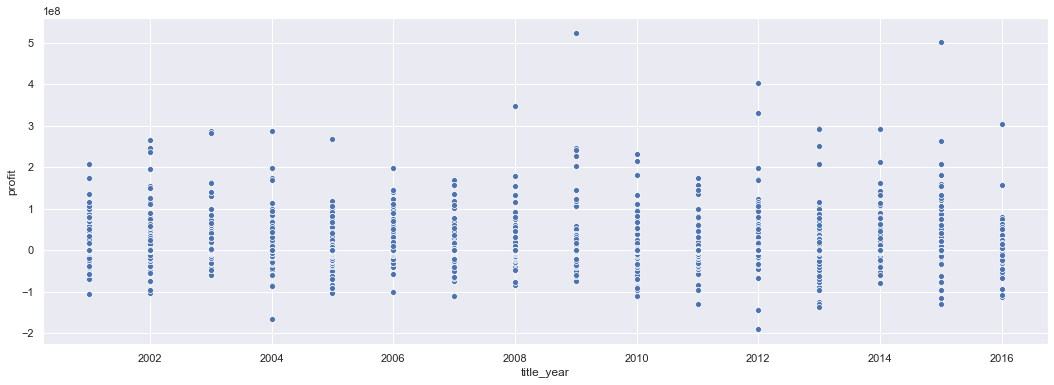

In [26]:
plt.figure(figsize=(18,6))
sns.scatterplot(x="title_year", y="profit", data = imdb_profit.query('title_year>2000'))
plt.show()

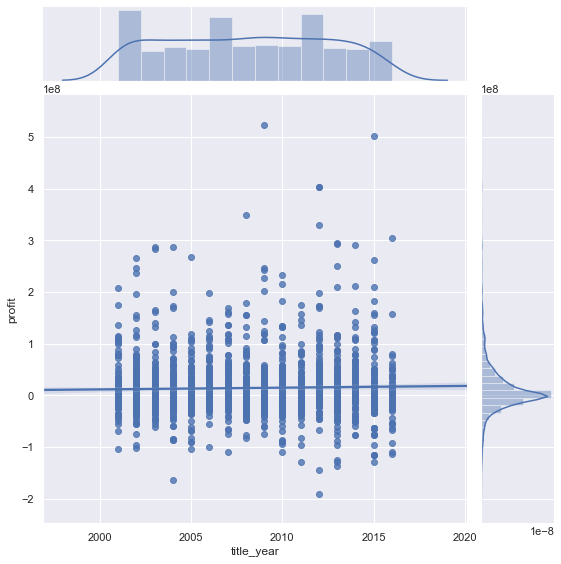

In [27]:
g = sns.jointplot(
    "title_year", 
    "profit", 
    data=imdb_profit.query('title_year>2000'),
    kind="reg", 
    truncate=False,
    height=8
)

### Conclusão

É possível verificar pelo gráfico de dispersão que os últimos lançamentos possuem menor lucro, entretanto há mais filmes que possuem lucro positivo, além de ter também uma boa % que não possuem o lucro informado. 

Além disso, há filmes em anos anteriores que tiveram 50% dos lucros abaixo dos filmes recentes (há casos desde 2009 a 2013, será que foi um efeito pós-crise financeira?)

## Desafio 4 do [Paulo Silveira](https://twitter.com/paulo_caelum)

Quais foram os filmes da decada pré 2° guerra que tiveram muito lucro.

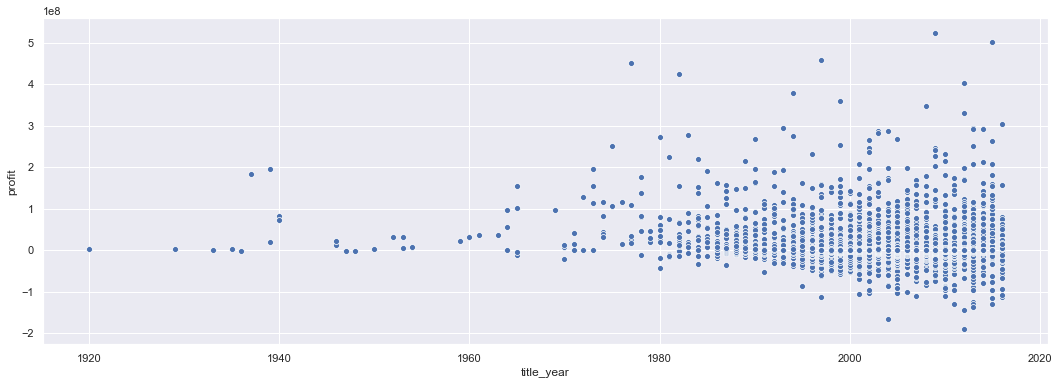

In [28]:
plt.figure(figsize=(18,6))
sns.scatterplot(x="title_year", y="profit", data = imdb_profit)
plt.show()

In [29]:
imdb_profit.query('title_year<1940 & profit>1e8')

,color,director_name,duration,gross,genres,movie_title,num_voted_users,language,country,budget,title_year,imdb_score,profit
3970,Color,Victor Fleming,226.00,"198,655,278.00",Drama|History|Romance|War,Gone with the Wind,215340,English,USA,"3,977,000.00","1,939.00",8.20,"194,678,278.00"
4449,Color,William Cottrell,83.00,"184,925,485.00",Animation|Family|Fantasy|Musical,Snow White and the Seven Dwarfs,133348,English,USA,"2,000,000.00","1,937.00",7.70,"182,925,485.00"


## Desafio 5 do [Paulo Silveira](https://twitter.com/paulo_caelum)

No gráfico de **filmes_irmaos por dindin** temos alguns pontos estranhos entre 15 e 20. Confirme a tese genial do Paulo que o cidadão estranho é o Woody Allen. (Se ele tiver errado pode cornete nas redes sociais kkkkk)

In [30]:
filmes_por_diretor = imdb_profit["director_name"].value_counts()
gross_director = imdb_profit[["director_name", "gross"]].set_index("director_name").join(filmes_por_diretor, on="director_name")
gross_director.columns=["gross", "movies"]
#gross_director = gross_director.reset_index()
gross_director.head()

,gross,movies
director_name,,
James Cameron,"760,505,847.00",6.00
Gore Verbinski,"309,404,152.00",7.00
Christopher Nolan,"448,130,642.00",8.00
Andrew Stanton,"73,058,679.00",3.00
Sam Raimi,"336,530,303.00",11.00


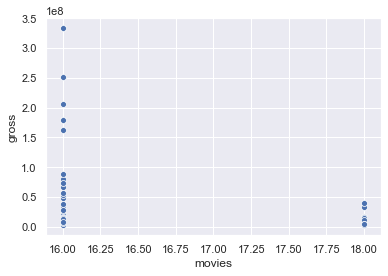

In [31]:
sns.scatterplot(x="movies", y="gross", data = gross_director.query('15<movies<20'))

In [32]:
gross_director.query('movies==18').groupby('director_name').count()['movies']

director_name
Woody Allen    18
Name: movies, dtype: int64

## Desafio 6 do [Thiago Gonçalves](https://twitter.com/tgcsantos)

Analise mais detalhadamente o gráfico pairplot, gaste um tempo pensando e tentando enteder os gráficos.

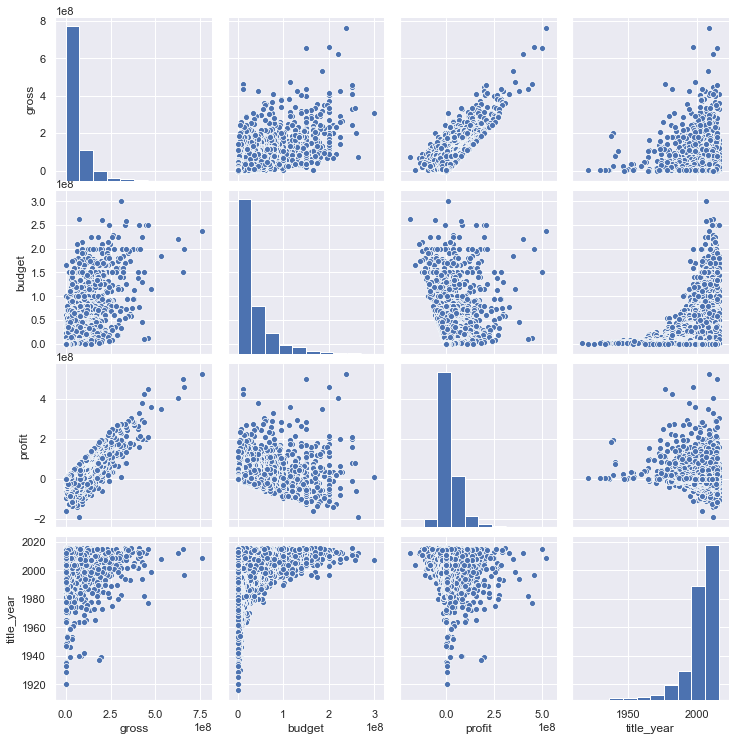

In [33]:
sns.pairplot(data = imdb_profit[["gross", "budget", "profit", "title_year"]])

## Desafio 7 do [Thiago Gonçalves](https://twitter.com/tgcsantos)


Calcular a correlação apenas dos filmes pós anos 2000 (Jogar fora filmes antes de 2000) e interpretar essa correlação.

,gross,budget,profit,title_year
gross,1.00,0.71,0.77,0.11
budget,0.71,1.00,0.10,0.14
profit,0.77,0.10,1.00,0.03
title_year,0.11,0.14,0.03,1.00


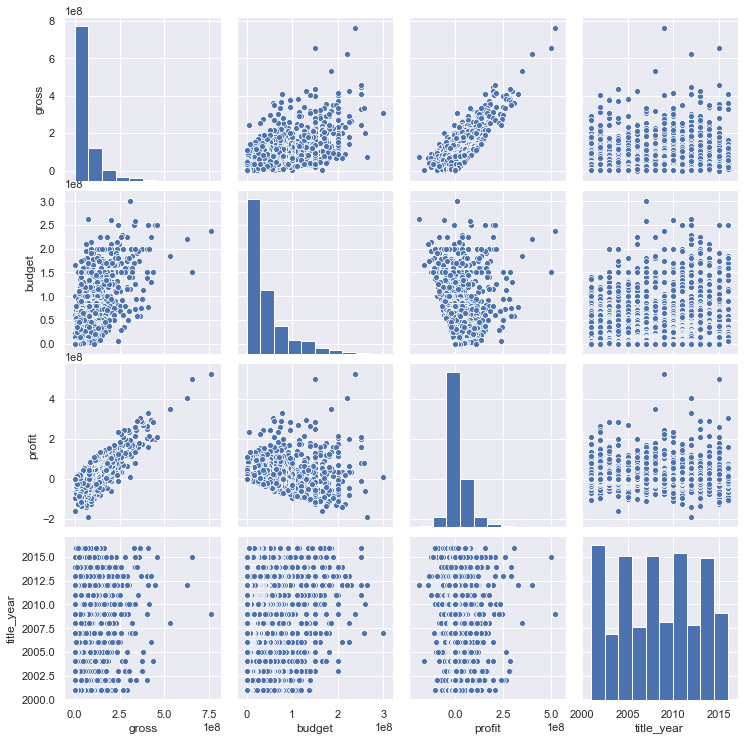

In [34]:
pos = imdb_profit.query("budget > 0 | gross > 0").dropna()
pos = pos.query("title_year > 2000")

sns.pairplot(data = pos[["gross", "budget", "profit", "title_year"]])
pos[["gross", "budget", "profit", "title_year"]].corr()

## Desafio 8 do [Allan Spadini](https://twitter.com/allanspadini)

Tentar encontrar uma reta, pode ser com uma régua no monitor (não faça isso), com o excel/google sheets, com o python, no gráfico que parece se aproximar com uma reta (por exemplo budget/lucro, gross/lucro)

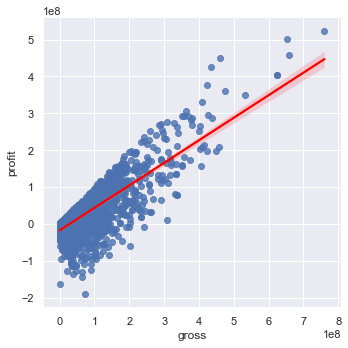

In [35]:
sns.lmplot(
    x="gross", 
    y="profit", 
    data = imdb_profit, line_kws={'color': 'red'}
)

## Desafio 9 da [Thais André](https://twitter.com/thais_tandre)

Analisar e interpretar a correlação de outras variáveis além das feitas em sala (notas é uma boa). Número de avaliações por ano pode ser também uma feature.


In [36]:
imdb_profit.corr()

,duration,gross,num_voted_users,budget,title_year,imdb_score,profit
duration,1.00,0.29,0.36,0.32,-0.12,0.27,0.13
gross,0.29,1.00,0.64,0.65,0.04,0.26,0.80
num_voted_users,0.36,0.64,1.00,0.43,0.03,0.45,0.51
budget,0.32,0.65,0.43,1.00,0.23,0.08,0.06
title_year,-0.12,0.04,0.03,0.23,1.00,-0.23,-0.12
imdb_score,0.27,0.26,0.45,0.08,-0.23,1.00,0.29
profit,0.13,0.80,0.51,0.06,-0.12,0.29,1.00


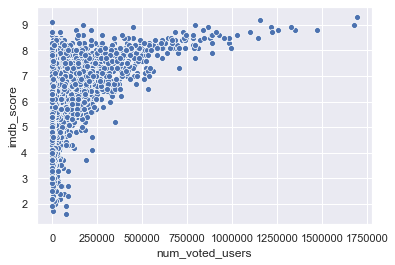

In [37]:
sns.scatterplot(
    data=imdb_profit[['num_voted_users','imdb_score']],
    x='num_voted_users',
    y='imdb_score'
)